<a href="https://colab.research.google.com/github/jonathanwise123/Sales_Performance_Analysis/blob/main/Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Clustering.csv")

In [5]:
df.head(100)

,Transaction Date,Transaction frequency,Payment Method,Purchase Details,Quantity,Age limit,Device Used,Customer Location,Payment success,Reversal Response,Account Age Days,Transaction hours,Transaction Amount
0,6/9/2024 20:06,Daily,Debit Card,Cloud storage,1.0,From 11-20,Android,Lagos,Very often,Very effective,156.0,1,"5,000"
1,6/9/2024 20:08,Daily,Debit Card,School Fees,3.0,From 11-20,Android,Ibadan,Very often,Very effective,156.0,1,"500,000"
2,6/9/2024 20:13,Yearly,Online Payment,Online shopping,1.0,From 20 - 40,Android,Ibadan,Very often,Very effective,52.0,5,NaN
3,6/9/2024 20:13,Daily,Bank transfer,Online shopping,8.0,From 11-20,"iOS (iPhone), Android",Ibadan,Very often,Very effective,260.0,1,"40,000"
4,6/9/2024 20:18,Weekly,Bank transfer,Online shopping,1.0,From 20 - 40,Android,Ibadan,Not often,Very effective,30.0,1,"5,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,3/16/2024 5:58,Daily,Bank transfer,Online shopping,26.0,From 40 - 50,iOs(iPhone),Lagos,Very often,Very effective,55.0,24,"124,635"
95,3/17/2024 5:58,Daily,Bank transfer,Online shopping,27.0,From 40 - 50,iOs(iPhone),Jos,Very often,Very effective,56.0,24,"126,135"
96,3/18/2024 5:58,Daily,Bank transfer,Online shopping,28.0,From 40 - 50,"Desktop, Android",Ibadan,Very often,Very effective,57.0,24,"127,635"
97,3/19/2024 5:58,Daily,Bank transfer,Online shopping,29.0,From 40 - 50,iOs(iPhone),Ibadan,Very often,Very effective,58.0,24,"129,135"


In [6]:
df.isnull().sum()

Transaction Date         0
Transaction frequency    0
Payment Method           0
Purchase Details         0
Quantity                 3
Age limit                0
Device Used              0
Customer Location        0
Payment success          1
Reversal Response        0
Account Age Days         2
Transaction hours        0
Transaction Amount       8
dtype: int64

In [7]:
df2 = df.fillna({'Transaction Amount': 0,'Account Age Days': 0,
                 'Quantity': 0, 'Payment sucess': 'Unknown'})
df2

,Transaction Date,Transaction frequency,Payment Method,Purchase Details,Quantity,Age limit,Device Used,Customer Location,Payment success,Reversal Response,Account Age Days,Transaction hours,Transaction Amount
0,6/9/2024 20:06,Daily,Debit Card,Cloud storage,1.0,From 11-20,Android,Lagos,Very often,Very effective,156.0,1,"5,000"
1,6/9/2024 20:08,Daily,Debit Card,School Fees,3.0,From 11-20,Android,Ibadan,Very often,Very effective,156.0,1,"500,000"
2,6/9/2024 20:13,Yearly,Online Payment,Online shopping,1.0,From 20 - 40,Android,Ibadan,Very often,Very effective,52.0,5,0
3,6/9/2024 20:13,Daily,Bank transfer,Online shopping,8.0,From 11-20,"iOS (iPhone), Android",Ibadan,Very often,Very effective,260.0,1,"40,000"
4,6/9/2024 20:18,Weekly,Bank transfer,Online shopping,1.0,From 20 - 40,Android,Ibadan,Not often,Very effective,30.0,1,"5,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,3/16/2024 5:58,Daily,Bank transfer,Online shopping,26.0,From 40 - 50,iOs(iPhone),Lagos,Very often,Very effective,55.0,24,"124,635"
95,3/17/2024 5:58,Daily,Bank transfer,Online shopping,27.0,From 40 - 50,iOs(iPhone),Jos,Very often,Very effective,56.0,24,"126,135"
96,3/18/2024 5:58,Daily,Bank transfer,Online shopping,28.0,From 40 - 50,"Desktop, Android",Ibadan,Very often,Very effective,57.0,24,"127,635"
97,3/19/2024 5:58,Daily,Bank transfer,Online shopping,29.0,From 40 - 50,iOs(iPhone),Ibadan,Very often,Very effective,58.0,24,"129,135"


In [8]:
df2.describe()

,Quantity,Account Age Days,Transaction hours
count,99.000000,99.000000,99.000000
mean,8.787879,102.545455,6.565657
std,8.273726,96.997188,8.534637
min,0.000000,0.000000,1.000000
25%,2.000000,38.500000,1.000000
50%,6.000000,52.000000,1.000000
75%,12.000000,156.000000,10.500000
max,30.000000,360.000000,24.000000


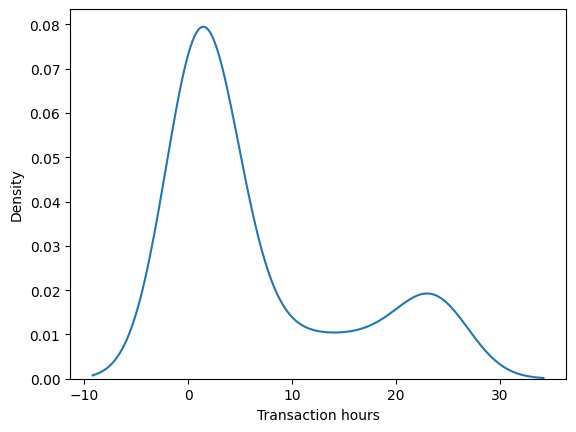

In [9]:
sns.kdeplot(df2['Transaction hours']);

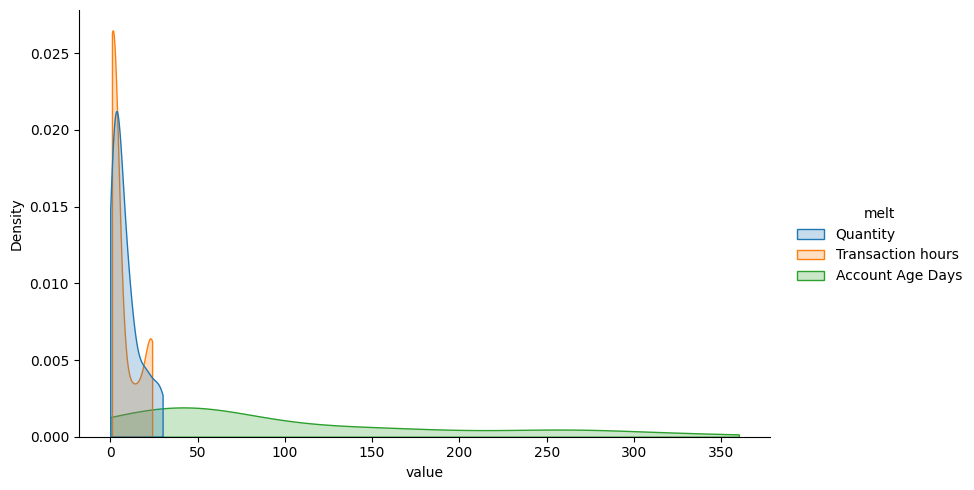

In [10]:
df2_long = pd.melt(df2, value_vars=['Quantity', 'Transaction hours', 'Account Age Days'], var_name='melt')

# Plotting the data with the converted long-form data
sns.displot(data=df2_long, x='value', hue='melt', kind="kde", fill=True, legend=True, height=5, aspect=1.6, cut=0, bw_adjust=1,label=True)

# Displaying the chart
plt.show()

In [11]:
df2['Transaction frequency'].value_counts()

Transaction frequency
Daily      73
Monthly    15
Weekly     10
Yearly      1
Name: count, dtype: int64

In [12]:
# Create a dictionary to map unique values to numerical categories
age_limit_mapping = {'From 11-20': 1, 'From 20 - 40': 2, 'From 40 - 50': 3}

# Use the map() function to assign numerical values to the 'Age limit' column
df2['Age limit category'] = df2['Age limit'].map(age_limit_mapping)

# Display the updated DataFrame
df2.head()

,Transaction Date,Transaction frequency,Payment Method,Purchase Details,Quantity,Age limit,Device Used,Customer Location,Payment success,Reversal Response,Account Age Days,Transaction hours,Transaction Amount,Age limit category
0,6/9/2024 20:06,Daily,Debit Card,Cloud storage,1.0,From 11-20,Android,Lagos,Very often,Very effective,156.0,1,"5,000",1
1,6/9/2024 20:08,Daily,Debit Card,School Fees,3.0,From 11-20,Android,Ibadan,Very often,Very effective,156.0,1,"500,000",1
2,6/9/2024 20:13,Yearly,Online Payment,Online shopping,1.0,From 20 - 40,Android,Ibadan,Very often,Very effective,52.0,5,0,2
3,6/9/2024 20:13,Daily,Bank transfer,Online shopping,8.0,From 11-20,"iOS (iPhone), Android",Ibadan,Very often,Very effective,260.0,1,"40,000",1
4,6/9/2024 20:18,Weekly,Bank transfer,Online shopping,1.0,From 20 - 40,Android,Ibadan,Not often,Very effective,30.0,1,"5,000",2
